# Algorithm Explained

In [2]:
from hybridjobs.utility.RNAParser import RNAData
from hybridjobs.utility.RNAQUBO import RNAQUBO
from hybridjobs.utility.AnnealerOptimizer import Annealer
from hybridjobs.utility.ResultProcess import ResultParser
import time

timestamp = time.strftime("%Y%m%d-%H")

2023-05-27 13:08:07,524 dwave.cloud INFO MainThread Log level for 'dwave.cloud' namespace set to 0


#### Step 1: Prepare Data

In this part, we load the folder with the raw rna data for experimentation. To evaluate the quantum solution and the actual solution include both fasta and ct files. To only generate a quantum solution, upload a fasta file.

In [3]:
from braket.aws import AwsQuantumJob, AwsSession

# initial parameters for experiment data
s3_bucket = AwsSession().default_bucket() # change to the name of bucket created in your deployment
prefix = "rna-folding" # the name of the folder in the bucket

# enter folder path, for instance './rna-data'
raw_path = './rna-folding-data'


In [4]:
rna_data = RNAData(raw_path)

data_path = rna_data.save("latest")

INFO:root:finish save rna-folding_data_latest.pickle


After running this block, the processed data 
will be saved as **rna-folding_bpRNA_CRW_32863_data_latest.pickle**
and **data_path** will be updated. We can see that this 
molecule has 23 bases.

#### Step 2: Build Model

In this part, we build the Quadratic Unconstrained 
Binary Optimization (QUBO) model for rna folding.

First, we set the following parameters and 
initialize the RNAQUBO object. 

<center>

| Parameter | Description | Value |
|--- |--- |--- |
| PKP | pseudoknot penalty | -1.0, -0.5, 0.0, 0.5, 1.0 |
| S | penalty for short stems | 1 |
| O | penalty for overlaps | 1e6 |
| method | the method of building model | 'qc' |
| data_path | pickle file directory of rna data |  |

 </center>

In [5]:
# initial the RNAQUBO object
init_param = {}
method = ['qc']

for mt in method:
    if mt == 'qc':
        init_param[mt] = {}
        init_param[mt]['params'] = ["PKP", "S", "O"]
    
rna_qubo = RNAQUBO( data_path, method, **init_param)

INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO
INFO:root:initial qc for constructing rna QUBO


In [6]:
# set the parameters for model
model_param = {}

method = 'qc'
model_param[method] = {}

# parameters
model_param[method]['PKP'] = [-1.0, -0.5, 0.0, 0.5, 1.0]
model_param[method]['S'] = [1]
model_param[method]['O'] = [1e6]

rna_qubo.build_models(**model_param)

0

In [7]:
# describe the model parameters
model_info = rna_qubo.describe_models()

INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_15984_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_PDB_368_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_32863_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_RFAM_9907_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_15563_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, 

In [8]:
# save the model
model_path = rna_qubo.save("latest")

print(f"You have built the QUBO models and saved them as rna_folding_latest.pickle")

INFO:root:finish save rna_folding_latest.pickle


You have built the QUBO models and saved them as rna_folding_latest.pickle


In [8]:
# !mv rna_folding_latest.pickle rna-data/

#### Step 3: Optimize Configuration

In this part, we use SA and QA to find the optimized configuration of rna folding.
At first, we load the model file using **RNAQUBO** object

In [9]:
rna_qubo_optimize = RNAQUBO.load(model_path)

In [10]:
model_info = rna_qubo_optimize.describe_models()

INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_15984_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_PDB_368_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_32863_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_RFAM_9907_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, value {1}
INFO:root:param: O, value {1000000.0}
INFO:root:method: qc
INFO:root:The model_name should be bpRNA_CRW_15563_{PKP}_{O}_{S}
INFO:root:param: PKP, value {-0.5, 0.0, 1.0, 0.5, -1.0}
INFO:root:param: S, 

In [11]:
# get the model you want to optimize
rna_name = 'bpRNA_CRW_32863'
PKP = 0.5
O = 1e6
S = 1
method = 'qc'

model_name = "{}+{}+{}+{}+".format(rna_name, PKP, O, S)

qubo_model = rna_qubo_optimize.get_model(rna_name, method, model_name)

After we get the qubo model, we need to set the parameters for optimization: 

| Parameter | Description | Value |
|--- |--- |--- |
|method | annealing method for QUBO problem |'dwave-sa': use the simulated annealer in ocean toolkit<br> 'dwave-qa': use the quantum annealer|
|shots| number of reads, refer to [dwave-sa](https://docs.ocean.dwavesys.com/projects/neal/en/latest/reference/generated/neal.sampler.SimulatedAnnealingSampler.sample.html#neal.sampler.SimulatedAnnealingSampler.sample) and [dwave-qa](https://amazon-braket-ocean-plugin-python.readthedocs.io/en/latest/_apidoc/braket.ocean_plugin.braket_sampler.html) for details |1 to 10,000|
|bucket | the s3 bucket to store your results | - |
|prefix | the name of the folder in your s3 bucket | - |
|device | the arn name to run your quantum annealing| 'arn:aws:braket:::device/qpu/d-wave/Advantage_system4' <br> 'arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6'|

Then, we can run the SA for this problem:

In [12]:
method = 'neal-sa'

optimizer_param = {}
optimizer_param['shots'] = 1000

sa_optimizer = Annealer(qubo_model, method, **optimizer_param)

INFO:root:use neal simulated annealer (c++) from dimod


In [13]:
sa_optimize_result = sa_optimizer.fit()

INFO:root:fit() ...
INFO:root:neal-sa save to local
INFO:root:finish save neal-sa_result.pickle


In [14]:
# dwave device has been moved to marketplace, please refer to the following link
# https://aws.amazon.com/blogs/quantum-computing/using-d-wave-leap-from-the-aws-marketplace-with-amazon-braket-notebooks-and-braket-sdk/
# method = 'dwave-qa'

# optimizer_param = {}
# optimizer_param['shots'] = 1000
# optimizer_param['bucket'] = s3_bucket # the name of the bucket
# optimizer_param['prefix'] = prefix # the name of the folder in the bucket
# optimizer_param['device'] = "arn:aws:braket:::device/qpu/d-wave/Advantage_system4"
# optimizer_param["embed_method"] = "default"

# qa_optimizer = Annealer(qubo_model, method, **optimizer_param)

# # not create annealing task, only embedding logic
# qa_optimizer.embed()
# # create annealing task
# qa_optimize_result = qa_optimizer.fit()

# qa_task_id = qa_optimizer.get_task_id()
# print(f"task id is {qa_task_id}")

In [14]:
print(f"dwave-sa run time {sa_optimize_result['time']}")
# print(f"dwave-qa run time {qa_optimize_result['time']}")

dwave-sa run time 0.3043785095214844


#### Step 4: Post Process

In this part, we post process the optimizing results for evaluation and visualization.
At first, we prepare the following parameters:

| Parameter | Description | Value |
|--- |--- |--- |
|method | annealing method for QUBO problem |'dwave-sa': use the simulated annealer in ocean toolkit<br> 'dwave-qa': use the quantum annealer|
|raw_path| the path for the original molecule file| './molecule-data/117_ideal.mol2' in this example |
|data_path| the path for the processed molecule file| './qmu_117_ideal_data_latest.mol2' in this example |
|bucket | the s3 bucket to store your results | - |
|prefix | the name of the folder in your s3 bucket | - |
|task_id | the id for your quantum annealing task| '2b5a3b05-1a0e-443a-852c-4ec422a10e59' in this example |

In [15]:
method = "neal-sa"
sa_param = {}
sa_param["raw_path"] = raw_path
sa_param["data_path"] = data_path

sa_process_result = ResultParser(method, **sa_param)
# print(f"{method} result is {sa_process_result.get_all_result()}")

local_time, _ , _, _= sa_process_result.get_time()

print(f"time for {method}: \n \
    local time is {local_time}")

INFO:root:_load_raw_result
INFO:root:load simulated annealer neal-sa raw result
INFO:root:_parse_model_info
INFO:root:Data.load()
INFO:root:actual energy is -36
INFO:root:parse simulated annealer result
INFO:root:_init_parameters
INFO:root:sa only has local_time!


time for neal-sa: 
     local time is 0.3043785095214844


In [16]:
sa_atom_pos_data = sa_process_result.generate_optimize_pts()
sa_result_json = sa_process_result.save_file(f"{timestamp}")

print(f"result optimization file path is {sa_result_json}")

INFO:root:generate_optimize_pts()
INFO:root:save_file 20230527-13
INFO:root:finish save bpRNA_CRW_32863_neal-sa_20230527-13.json


result optimization file path is bpRNA_CRW_32863_neal-sa_20230527-13.json


In [17]:
sa_process_result.parameters

{'rna-strand': 'GCGGGUAUAGUUUAGUGGUAAAA',
 'rna-name': 'bpRNA_CRW_32863',
 'structure': {'actual': {'stems': [[11, 23, 6]], 'energy': -36},
  'predict': {'stems': [[11, 22, 8, 4]],
   'energy': -64.0,
   'bp-specificity': 0.0,
   'bp-sensitivity': 0.0,
   'bases-specificity': 0.9333333333333333,
   'bases-sensitivity': 0.875}}}

INFO:forgi.graph._cofold:Testing connectivity: connected component =?= all nodes:
['f0', 'h0', 's0'] =?= ['f0', 'h0', 's0']
INFO:forgi.graph.bulge_graph:Stems with length 1: []
INFO:forgi.visual.mplotlib:Starting to plot RNA...


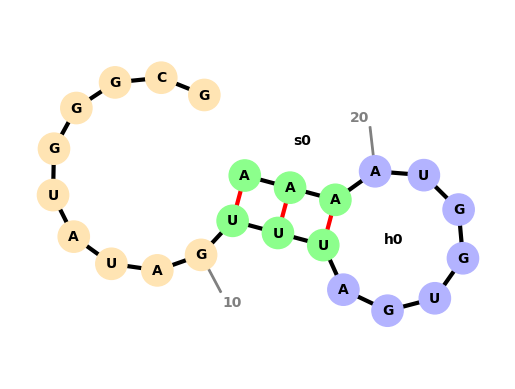

In [18]:
sa_process_result.RNAFoldingView('raw',raw_path)

INFO:forgi.graph._cofold:Testing connectivity: connected component =?= all nodes:
['f0', 'h0', 's0', 't0'] =?= ['f0', 'h0', 's0', 't0']
INFO:forgi.graph.bulge_graph:Stems with length 1: []
INFO:forgi.visual.mplotlib:Starting to plot RNA...
INFO:forgi.visual.mplotlib:Cannot annotate h0 as 'h0' ON THE INSIDE, because of insufficient space. Trying outside...


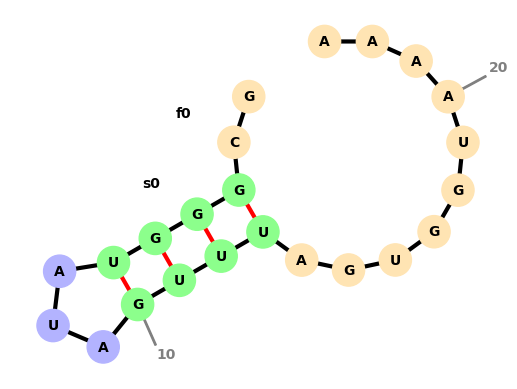

In [19]:
sa_process_result.RNAFoldingView('predict',raw_path)

In [21]:
# The following codes can be used as the reference once you can access d-wave devices from marketplace
# method = "dwave-qa"
# qa_param = {}
# qa_param["bucket"] = s3_bucket
# qa_param["prefix"] = prefix
# qa_param["task_id"] = qa_task_id
# qa_param["raw_path"] = raw_path
# qa_param["data_path"] = data_path

# qa_process_result = ResultParser(method, **qa_param)
# # print(f"{method} result is {qa_process_result.get_all_result()}")

# local_time, task_time, total_time, access_time = qa_process_result.get_time()

# print(f"time for {method}: \n \
#     local time is {local_time},\n \
#     task time is {task_time}, \n \
#     qpu total time is {total_time}, \n \
#     qpu access time is {access_time}")

In [22]:
# qa_atom_pos_data = qa_process_result.generate_optimize_pts()
# qa_result_json = qa_process_result.save_file(f"{timestamp}")
# print(f"result optimization file path is {qa_result_json}")

# Hybrid Job Experiment

In [1]:
from braket.aws import AwsQuantumJob
from braket.jobs.config import InstanceConfig
import boto3
import json
import time
import altair as alt
import pandas as pd
import numpy as np
from utility.HybridJobHelpers import *

#### Step 1: Prepare parameters for batch evaluation

In this part, we set the parameters for batch evaluation


In [2]:
# parameters for experiments
experiment_name = "rna-folding-qubo"
data_path = "rna-folding-data"
suffix_check = ["txt"]
experiments_params =  {
    "version": "1",
    "params": [
        # {"PKP": [-1.0, -0.5, 0.0, 0.5, 1.0]},
        {"PKP": [-1.0]},
        {"S": [1]},
        {"O": [1000000]},
        {"shots": [10000]},
        {"device": [{"qc": "null", "cc": "ml.m5.large"},{"qc": "null", "cc": "ml.m5.4xlarge"}]}
    ]
}

hp = {}
hybrid_job_params = []
parse_params(experiments_params['params'], hp, hybrid_job_params)

print(f"parameters for experiments: \n {hybrid_job_params}")

parameters for experiments: 
 [{'PKP': -1.0, 'S': 1, 'O': 1000000, 'shots': 10000, 'device': {'qc': 'null', 'cc': 'ml.m5.large'}}, {'PKP': -1.0, 'S': 1, 'O': 1000000, 'shots': 10000, 'device': {'qc': 'null', 'cc': 'ml.m5.4xlarge'}}]


In [22]:
# Upload dataset to S3
s3_path = upload_data(data_path, suffix_check)
print(f"upload data to s3 path: {s3_path}")

upload data to s3 path: s3://amazon-braket-us-east-1-002224604296/rna-folding-data


#### Step 2: Prepare image for experiment

In this part, we use the following code to prepare the image for experiment. For the first run, 
please run build_and_push.sh to create the image. For future experiments, avoid running
build_and_push.sh unless you want to rebuild the image

In [23]:
account_id = boto3.client("sts").get_caller_identity()["Account"]
region = boto3.client('s3').meta.region_name
image_name = f"amazon-braket-{experiment_name}-jobs"
image_uri = f"{account_id}.dkr.ecr.{region}.amazonaws.com/{image_name}:latest"

print(f"the hybrid job image for {account_id} in region {region}: {image_uri}")

# For the first run, please use the following code to create the image for this application. For future experiments, comment
# the following code unless you want to rebuild the image
!sh build_and_push.sh {image_name}

the hybrid job image for 002224604296 in region us-east-1: 002224604296.dkr.ecr.us-east-1.amazonaws.com/amazon-braket-rna-folding-jobs:latest
WARNING! Your password will be stored unencrypted in /home/ubuntu/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store

Login Succeeded
WARNING! Your password will be stored unencrypted in /home/ubuntu/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store

Login Succeeded
Sending build context to Docker daemon  560.5MB
Step 1/4 : FROM 292282985366.dkr.ecr.us-west-2.amazonaws.com/amazon-braket-base-jobs:1.0-cpu-py37-ubuntu18.04
 ---> 16b9ec942e00
Step 2/4 : RUN python3 -m pip install --upgrade pip
 ---> Using cache
 ---> 11a512e96ae1
Step 3/4 : RUN python3 -m pip install dimod==0.10.12                            dwave-system==1.15.0            

In [4]:
hybrid_jobs_json = f"{experiment_name}-hybrid-jobs.json"
print(f"job info will be saved in {hybrid_jobs_json}")

job info will be saved in rna-folding-hybrid-jobs.json


#### Step 3: Launch Amazon Braket Hybrid Jobs for experiment

In this part, we use the following code to launch the same number of hybrid jobs as the sets of parameters for this experiments.
When the number of jobs exceeds 5 RPS, this thread will wait. The default setting of this experiment will take around **7 hours** to 
finish.

In [25]:
# Long runnning cell due to Burst rate of CreateJob requests < 5 RPS
# sudo apt-get install python-prctl at first
# https://stackoverflow.com/questions/34361035/python-thread-name-doesnt-show-up-on-ps-or-htop
from threading import Thread
import threading
import setproctitle
import uuid
U=str(uuid.uuid4())[:4]

def launch_hybrid_jobs(hybrid_job_params=hybrid_job_params, hybrid_jobs_json=hybrid_jobs_json):
    setproctitle.setproctitle(threading.current_thread().name)
    # parse evaluation parameters and trigger hybrid jobs:
    jobs = []
    names = []

    job_name = f"{experiment_name}-job"

    for job_param in hybrid_job_params:
        PKP = job_param['PKP']
        S = job_param['S']
        O = job_param['O']
        quantum_device = get_quantum_device(job_param['device']['qc'])
        classical_device = job_param['device']['cc']

        device_name = classical_device.replace(".","-")
        device_name = device_name.replace("x","")
        
        name = f"{U}-{experiment_name}-PKP-{str(PKP).replace('.','')}-{device_name}"

        tmp_job = AwsQuantumJob.create(
            device=quantum_device,
            source_module="hybridjobs",
            entry_point=f"hybridjobs.{job_name}:main",
            job_name=name,
            hyperparameters=job_param,
            input_data=s3_path,
            instance_config=InstanceConfig(instanceType=classical_device),
            image_uri=image_uri,
            wait_until_complete=False,
        )
        
#         from braket.jobs.local import LocalQuantumJob
        
#         tmp_job = LocalQuantumJob.create(
#             device=quantum_device,
#             source_module=f"{experiment_name}",
#             entry_point=f"{experiment_name}.{job_name}:main",
#             hyperparameters=job_param,
#             input_data=s3_path,
#             image_uri=image_uri,
#         )   
        
        
        print(f"Finish create {experiment_name} with PKP {PKP}, S {S} , O {O} and device {device_name}")

        jobs.append(tmp_job)
        names.append(name)


        while not queue_check(jobs):
            time.sleep(5)
    jobs_arn = []

    for job in jobs:
        jobs_arn.append(job.arn)

    jobs_states = {
        "experiment_name": experiment_name,
        "hybrid-jobs-arn": jobs_arn,
        "names": names
    }
    
    
    # save hybrid job arn for further analysis
    json_object = json.dumps(jobs_states, indent=4)

    with open(hybrid_jobs_json, "w") as outfile:
        outfile.write(json_object)
        
    print(f"Finish launch all the hybrid jobs and save all the files")

# remove existing hybrid_jobs_json file
!rm {hybrid_jobs_json}

t = Thread(target=launch_hybrid_jobs, name="launch-hybrid-job", daemon=True).start()

# launch_hybrid_jobs()

rm: cannot remove 'rna-folding-hybrid-jobs.json': No such file or directory


INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


fail to get null: list index out of range, use sv1 instead
Finish create rna-folding with PKP -1.0, S 1 , O 1000000 and device ml-m5-large


INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


There are 3 jobs in RUNNING or QUEUED status


INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


fail to get null: list index out of range, use sv1 instead


In [28]:
# run the following scripts to check the created threads
!ps -aux | grep launch-hybrid-job

ubuntu     34835  0.8  1.1 1756008 377764 ?      Sl   12:01   0:48 launch-hybrid-job
ubuntu     39153 14.5 23.1 8922380 7431868 ?     Sl   13:06   3:42 launch-hybrid-job
ubuntu     39754  0.0  0.0   8756  3604 pts/1    Ss+  13:31   0:00 /bin/bash -c ps -aux | grep launch-hybrid-job
ubuntu     39759  0.0  0.0   8176   724 pts/1    S+   13:31   0:00 grep launch-hybrid-job


There are 4 jobs in RUNNING or QUEUED status
There are 4 jobs in RUNNING or QUEUED status
There are 4 jobs in RUNNING or QUEUED status
There are 4 jobs in RUNNING or QUEUED status
There are 3 jobs in RUNNING or QUEUED status
Finish launch all the hybrid jobs and save all the files


#### Step 4: Jobs finish and visualize results

Please use the following code to check the status of hybrid jobs. The status of hybrid jobs can also be checked in the Amazon Braket console. Optionally, if the email if input when deploying the solution, emails will be sent at the same number of hybrid jobs once 
the status of jobs changes.

In [5]:
# run the following code to test whether all the jobs finish
results = []
if os.path.exists(hybrid_jobs_json):
    # recover hybrid jobs and show result
    jobs_states_load = None
    with open(hybrid_jobs_json, "r") as outfile:
        jobs_states_load = json.load(outfile)

    completed_jobs_arn = set()

    for job_name, job_arn in zip(jobs_states_load["names"], jobs_states_load["hybrid-jobs-arn"]):
        current_job = AwsQuantumJob(job_arn)
        print(f"the state of job {job_name} is : {current_job.state()}")
        if current_job.state() == 'COMPLETED':
            completed_jobs_arn.update({job_arn})

    whole_jobs_num = len(jobs_states_load["names"])

    if len(completed_jobs_arn) == whole_jobs_num:
        print(f"all jobs completed")
        for job_arn in completed_jobs_arn:
            current_job = AwsQuantumJob(job_arn)
            results.append(current_job.result())
        # display results
        results = display_results(results, experiments_params)
else:
    print(f"JSON file for job arns not generated! please wait for the thread(launch-hybrid-job) to finish")

the state of job dec4-rna-folding-PKP--10-ml-m5-large is : COMPLETED
the state of job dec4-rna-folding-PKP--10-ml-m5-4large is : COMPLETED
all jobs completed


In [6]:
rename_result = {}
device_list = []
x_list = []
y_list = []
for k,vs in results.items():
    k = k.replace("\'","\"")
    dict_k = json.loads(k)
    device_name = None
    if dict_k['qc'] == 'null':
        device_name = dict_k['cc']
    else:
        device_name = dict_k['qc']
    for v in vs:
        device_list.append(device_name)
        x_list.append(v[0])
        y_list.append(v[1])
source = pd.DataFrame({
    "Sequence Length": np.array(x_list),
    "Time to Solution": np.array(y_list),
    "Device": np.array(device_list),
})

alt.Chart(source).mark_line(point = True).encode(
    x='Sequence Length',
    y='Time to Solution',
    color='Device',
).properties(
    title = f"{experiment_name} experiments",
    width = 700,
    height = 600,
).interactive()

AttributeError: 'Series' object has no attribute 'iteritems'

alt.Chart(...)